# Imports

In [59]:
import os
import re

#from nltk.tokenize import word_tokenize

#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.fixes import signature
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest

import operator
import matplotlib.pyplot as plt

import numpy as np
from numpy import array

In [2]:
np.random.seed(7)

# Using all 10 data folders for training and validation, splitting them later at random

## You can use 10-fold cross validation experiments for HYPER PARAMETER TUNING

In [3]:
#directory_path = r"C:\Users\Κωστας\Desktop\SpamHam_NLP\lingspam_public\lemm"

In [4]:
directory_path = "/media/spiros/Data/lingspam_public/bare/"

# Load txt files and create a mail list (inputs) and a spam/ham list (outputs)

In [5]:
#spam_ham_tuple_list = list()
mails = list()
spams = list()
for folder in os.listdir(directory_path):
    for file in os.listdir(os.path.join(directory_path, folder)):
        if file.endswith(".txt"):
            with open(os.path.join(directory_path, folder, file), encoding='utf8') as f:
                mail = f.read().strip()
                # Clean each mail
                # Remove all the special characters
                #mail = re.sub(r'\W', ' ', mail)

                # Remove all single characters
                #mail = re.sub(r'\s+[a-zA-Z]\s+', ' ', mail)

                # Substituting multiple spaces with single space
                mail = re.sub(r'\s+', ' ', mail, flags=re.I)

                # Convert to Lowercase
                mail = mail.lower()
                
                mails.append(mail)
                
                if file.startswith("spm"):
                    #spam_ham_tuple_list.append((mail,1))
                    spams.append(1)
                else:
                    #spam_ham_tuple_list.append((mail,0))
                    spams.append(0)

In [6]:
# mail_word_sequences = list()
# for mail, spam in spam_ham_tuple_list:
#     mail_word_sequences.append((word_tokenize(mail), spam))

In [7]:
# mails = list()
# spams = list()
# for mail, spam in spam_ham_tuple_list:
#     mails.append(mail)
#     spams.append(spam)

## Much more ham than spam mails, however if the recall turns out to be high, I suggest not adding more copies of spam mails in order to achieve a 50-50 distribution

In [8]:
unique, counts = np.unique(spams, return_counts=True)
print("Ham mails count: "+str(counts[0]))
print("Spam mails count: "+str(counts[1]))

Ham mails count: 2412
Spam mails count: 481


# TF-IDF

### From https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html:

### max_df : float in range [0.0, 1.0] or int (default=1.0) When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts.

### min_df : float in range [0.0, 1.0] or int (default=1) When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

### max_features : int or None (default=None) If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

### ngram_range : tuple (min_n, max_n) (default=(1, 1)) The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [123]:
tfidfconverter = TfidfVectorizer(min_df=10, max_df=0.8, stop_words='english', ngram_range=(1,3)
                                 , max_features=1000
                                )  
X = tfidfconverter.fit_transform(mails).toarray()

In [117]:
y = array(spams)
#dictionary = dict(zip(X, y))
#dictionary=DictVectorizer()
#dictionary.get_feature_names()


## Input and output feature vectors dimensions

In [118]:
X.shape

(2893, 14166)

In [119]:
y.shape

(2893,)

# Information gain / Mutual Information feature selection

In [124]:
def mutual_info_classif_custom(X, y):
    return mutual_info_classif(X, y, discrete_features=True)

In [125]:
#X = SelectKBest(mutual_info_classif_custom, k=1000).fit_transform(X, y)

In [126]:
X.shape

(2893, 1000)

In [53]:
# a=0.88
# #takes an argument "a" and cuts the a% percentage of the features with the lower Information Gain
# def InformationGain(a,X,y):
#     inf_gain = mutual_info_classif(X, y, discrete_features=True)
#     print(len(inf_gain))
#     #inf_gain.shape
#     res = dict(zip(tfidfconverter.get_feature_names(),inf_gain))
#     res_sort = sorted(res.items(), key=operator.itemgetter(1), reverse=True)
#     y=len(res)
#     if a>=0 and a<=1:
#         while (1-a)*y<=len(res_sort):
#             res_sort.pop()
#     else :
#         print("Not acceptable argument for variable 'a'")
        
#     #print(res_sort)
#     return res_sort

# PCA Dimensonality reduction (Does nothing for now)

Text(0, 0.5, 'Cumulative explained variance')

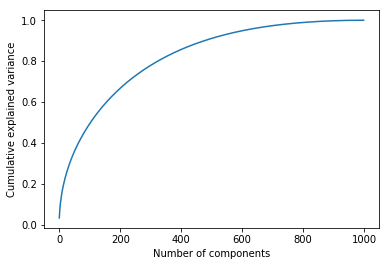

In [76]:
pca = PCA()
pca.fit(X)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Seems to have much lower recall with PCA

In [13]:
#pca = PCA(n_components=2000)
#pca.fit(X)
#X = pca.fit_transform(X)

# Truncated SVD Dimensonality reduction (Does nothing for now)

Text(0, 0.5, 'Cumulative explained variance')

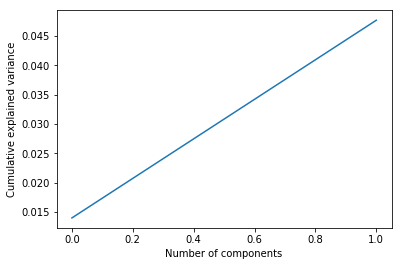

In [85]:
svd = TruncatedSVD()
svd.fit(X)


plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# svd = TruncatedSVD(n_components=500)
# svd.fit(X)
# X = svd.fit_transform(X)

In [86]:
X.shape

(2893, 1000)

# Train Test split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Random Forest

## Training

In [128]:
random_forest = RandomForestClassifier(n_estimators=1000, random_state=0)  
random_forest.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Evaluation

In [129]:
y_pred = random_forest.predict(X_test)

In [130]:
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       482
           1       0.99      0.93      0.96        97

   micro avg       0.99      0.99      0.99       579
   macro avg       0.99      0.96      0.97       579
weighted avg       0.99      0.99      0.99       579

0.9861830742659758


In [131]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)

Text(0.5, 1.0, 'Precision-Recall curve')

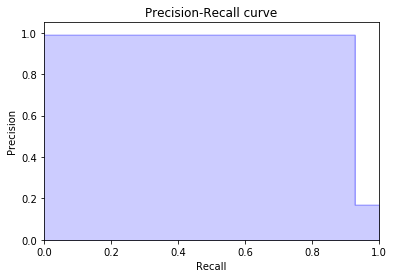

In [132]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall_curve, precision_curve, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_curve, precision_curve, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')

# Logistic Regression

In [133]:
logistic = LogisticRegression(random_state=0, solver='liblinear')  
logistic.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Evaluation

In [134]:
y_pred = logistic.predict(X_test)

In [135]:
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       482
           1       1.00      0.97      0.98        97

   micro avg       0.99      0.99      0.99       579
   macro avg       1.00      0.98      0.99       579
weighted avg       0.99      0.99      0.99       579

0.9948186528497409


In [136]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)

Text(0.5, 1.0, 'Precision-Recall curve')

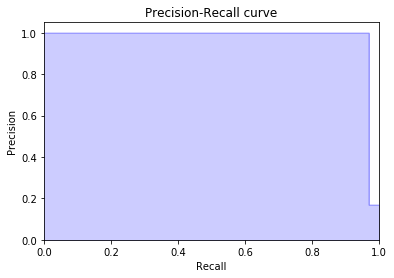

In [137]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall_curve, precision_curve, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_curve, precision_curve, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')

# Naive Bayes

In [138]:
naive_bayes = MultinomialNB()  
naive_bayes.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Evaluation

In [139]:
y_pred = naive_bayes.predict(X_test)

In [140]:
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       482
           1       1.00      0.96      0.98        97

   micro avg       0.99      0.99      0.99       579
   macro avg       1.00      0.98      0.99       579
weighted avg       0.99      0.99      0.99       579

0.9930915371329879


In [141]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)

Text(0.5, 1.0, 'Precision-Recall curve')

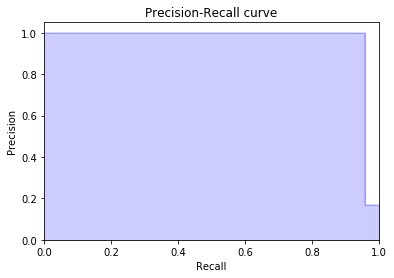

In [142]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall_curve, precision_curve, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_curve, precision_curve, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')

# k-NN

In [143]:
knn = KNeighborsClassifier()  
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Evaluation

In [144]:
y_pred = knn.predict(X_test)

In [145]:
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       482
           1       0.96      0.96      0.96        97

   micro avg       0.99      0.99      0.99       579
   macro avg       0.98      0.98      0.98       579
weighted avg       0.99      0.99      0.99       579

0.9861830742659758


In [146]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)

Text(0.5, 1.0, 'Precision-Recall curve')

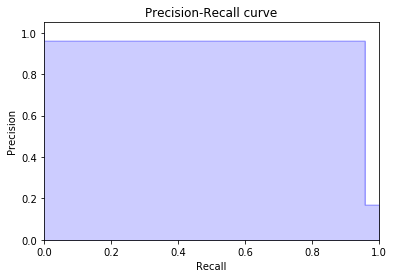

In [147]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall_curve, precision_curve, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_curve, precision_curve, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')

# SVM

In [148]:
svm = LinearSVC()  
svm.fit(X_train, y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## Evaluation

In [149]:
y_pred = svm.predict(X_test)

In [150]:
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       482
           1       0.99      0.98      0.98        97

   micro avg       0.99      0.99      0.99       579
   macro avg       0.99      0.99      0.99       579
weighted avg       0.99      0.99      0.99       579

0.9948186528497409


In [151]:
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)

Text(0.5, 1.0, 'Precision-Recall curve')

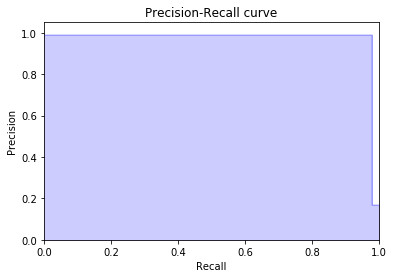

In [152]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall_curve, precision_curve, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_curve, precision_curve, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')

### For parameter tuning, try to use gridsearch from sklearn